### Step 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load breast cancer data
cnc_brt = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cnc_brt.data, cnc_brt.target, random_state=0)

In [3]:
# https://stackoverflow.com/questions/27324356/picking-n-neighbors-for-kneighborsclassifier
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn?irclickid=192RY-1KOxyPWKU0nBRYswtFUkFR7oRwuXPu1U0&irgwc=1&im_rewards=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# to find the best n_neighbors for kNeighbor classifier using GridsearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

# ref: https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/
print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 3}


In [4]:

minmax_classifier =  KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train) 
X_test_scaled = scaler.transform(X_test)
print("R^2 score from n_neighbours=3 is: ", minmax_classifier.score(X_test_scaled, y_test))


# ref: https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm

R^2 score from n_neighbours=3 is:  0.951048951048951


2) Repeat Step 1 using pipelines and report the score.

In [5]:
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))
param_grid = {'kneighborsregressor--n_neighbors':range(1, 10)}

knn_pipe.fit(X_train_scaled, y_train)

print(knn_pipe.score(X_train_scaled,y_train))
print(knn_pipe.score(X_test_scaled,y_test))

0.9812206572769953
0.951048951048951


3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor. 

In [6]:
from sklearn.model_selection import GridSearchCV

gridsearch_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(gridsearch_pipe, param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.970
best parameters: {'kneighborsclassifier__n_neighbors': 5}
test-set score: 0.958


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y. 
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [7]:
import pandas as pd

# Read the data from the file 
bikeday_df = pd.read_csv("bike_day_raw.csv")
bikeday_df.head()

X = bikeday_df.drop('cnt', axis=1)

y = bikeday_df['cnt']
print(X)
print(y)

     season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  
0    0.363625  0.805833   0.160446  
1    0.353739  0.696087   0.248539  
2    0.18940

In [8]:
print(y)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64


In [9]:
print("the shape of the dataframe: ", bikeday_df.shape)
print("-----")
print("the types of the data in the df: \n", bikeday_df.dtypes)
print("------------")
print("the columns' names are: \n", bikeday_df.columns)
print("-----------")
print("the shape of the X: ", X.shape)
print("the shape of the y: ", y.shape)

the shape of the dataframe:  (731, 11)
-----
the types of the data in the df: 
 season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object
------------
the columns' names are: 
 Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
-----------
the shape of the X:  (731, 10)
the shape of the y:  (731,)


In [10]:
# to find the unique values in each column to deytermine if the column fits into categorical or numerical category

bikeday_df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
bikeday_df.workingday.unique()

array([0, 1], dtype=int64)

In [12]:
bikeday_df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [13]:
bikeday_df.holiday.unique()

array([0, 1], dtype=int64)

In [14]:
bikeday_df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [15]:
bikeday_df.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [16]:
bikeday_df.temp.unique()

array([0.344167 , 0.363478 , 0.196364 , 0.2      , 0.226957 , 0.204348 ,
       0.196522 , 0.165    , 0.138333 , 0.150833 , 0.169091 , 0.172727 ,
       0.16087  , 0.233333 , 0.231667 , 0.175833 , 0.216667 , 0.292174 ,
       0.261667 , 0.1775   , 0.0591304, 0.0965217, 0.0973913, 0.223478 ,
       0.2175   , 0.195    , 0.203478 , 0.216522 , 0.180833 , 0.192174 ,
       0.26     , 0.186957 , 0.211304 , 0.285833 , 0.271667 , 0.220833 ,
       0.134783 , 0.144348 , 0.189091 , 0.2225   , 0.316522 , 0.415    ,
       0.266087 , 0.318261 , 0.435833 , 0.521667 , 0.399167 , 0.285217 ,
       0.303333 , 0.182222 , 0.221739 , 0.295652 , 0.364348 , 0.2825   ,
       0.343478 , 0.407273 , 0.266667 , 0.335    , 0.198333 , 0.384167 ,
       0.376522 , 0.261739 , 0.2925   , 0.295833 , 0.389091 , 0.329167 ,
       0.384348 , 0.325217 , 0.317391 , 0.365217 , 0.54     , 0.4725   ,
       0.3325   , 0.430435 , 0.441667 , 0.346957 , 0.285    , 0.264167 ,
       0.265833 , 0.253043 , 0.264348 , 0.3025   , 

In [17]:
bikeday_df.atemp.unique()

array([0.363625 , 0.353739 , 0.189405 , 0.212122 , 0.22927  , 0.233209 ,
       0.208839 , 0.162254 , 0.116175 , 0.150888 , 0.191464 , 0.160473 ,
       0.150883 , 0.188413 , 0.248112 , 0.234217 , 0.176771 , 0.232333 ,
       0.298422 , 0.25505  , 0.157833 , 0.0790696, 0.0988391, 0.11793  ,
       0.234526 , 0.2036   , 0.2197   , 0.223317 , 0.212126 , 0.250322 ,
       0.18625  , 0.23453  , 0.254417 , 0.177878 , 0.228587 , 0.243058 ,
       0.291671 , 0.303658 , 0.198246 , 0.144283 , 0.149548 , 0.213509 ,
       0.232954 , 0.324113 , 0.39835  , 0.254274 , 0.3162   , 0.428658 ,
       0.511983 , 0.391404 , 0.27733  , 0.284075 , 0.186033 , 0.245717 ,
       0.289191 , 0.350461 , 0.282192 , 0.351109 , 0.400118 , 0.263879 ,
       0.320071 , 0.200133 , 0.255679 , 0.378779 , 0.366252 , 0.238461 ,
       0.3024   , 0.286608 , 0.385668 , 0.305    , 0.32575  , 0.380091 ,
       0.332    , 0.318178 , 0.36693  , 0.410333 , 0.527009 , 0.466525 ,
       0.409735 , 0.440642 , 0.337939 , 0.270833 , 

In [18]:
bikeday_df.hum.unique()

array([0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.518261,
       0.498696, 0.535833, 0.434167, 0.482917, 0.686364, 0.599545,
       0.470417, 0.537826, 0.49875 , 0.48375 , 0.5375  , 0.861667,
       0.741739, 0.538333, 0.457083, 0.4     , 0.436522, 0.491739,
       0.616957, 0.8625  , 0.6875  , 0.793043, 0.651739, 0.722174,
       0.60375 , 0.829565, 0.775417, 0.437826, 0.585217, 0.929167,
       0.568333, 0.738333, 0.537917, 0.494783, 0.437391, 0.506364,
       0.544167, 0.457391, 0.375833, 0.314348, 0.423478, 0.505   ,
       0.516667, 0.187917, 0.407826, 0.605   , 0.577778, 0.423043,
       0.697391, 0.712174, 0.68    , 0.876364, 0.535   , 0.449583,
       0.318333, 0.610417, 0.789167, 0.948261, 0.551304, 0.420833,
       0.      , 0.649565, 0.594583, 0.527391, 0.496957, 0.655652,
       0.776522, 0.602917, 0.525217, 0.379167, 0.47375 , 0.737391,
       0.624583, 0.839565, 0.495   , 0.394167, 0.493913, 0.302174,
       0.314167, 0.646667, 0.918333, 0.68625 , 0.65375 , 0.48 

In [19]:
bikeday_df.windspeed.unique()

array([0.160446 , 0.248539 , 0.248309 , 0.160296 , 0.1869   , 0.0895652,
       0.168726 , 0.266804 , 0.36195  , 0.223267 , 0.122132 , 0.304627 ,
       0.301    , 0.126548 , 0.157963 , 0.188433 , 0.194017 , 0.146775 ,
       0.208317 , 0.195904 , 0.353242 , 0.17197  , 0.2466   , 0.15833  ,
       0.129796 , 0.29385  , 0.113837 , 0.1233   , 0.145365 , 0.0739826,
       0.187192 , 0.053213 , 0.264308 , 0.277752 , 0.127839 , 0.161079 ,
       0.1418   , 0.0454083, 0.188839 , 0.221935 , 0.10855  , 0.203367 ,
       0.260883 , 0.417908 , 0.291374 , 0.251791 , 0.230104 , 0.264925 ,
       0.507463 , 0.223235 , 0.307846 , 0.195683 , 0.094113 , 0.250496 ,
       0.346539 , 0.186571 , 0.125248 , 0.289686 , 0.216425 , 0.307833 ,
       0.225754 , 0.203346 , 0.251871 , 0.343287 , 0.341352 , 0.12065  ,
       0.22015  , 0.261877 , 0.23297  , 0.220775 , 0.270604 , 0.136926 ,
       0.184309 , 0.203117 , 0.209579 , 0.231017 , 0.368167 , 0.207721 ,
       0.288783 , 0.22575  , 0.234261 , 0.243787 , 

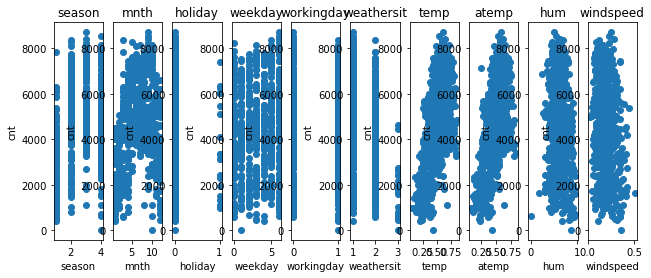

In [20]:
#  a scatterplot of each feature against the target variable
import matplotlib.pyplot as plt

features= X
target=bikeday_df['cnt']
plt.figure( figsize=(777,4))
for i,col in enumerate(features):
	plt.subplot(1,len(features),i+1)
	x=bikeday_df[col]
	y=target
	plt.scatter(x,y,marker='o')
	plt.title(col)
	plt.xlabel(col)
	plt.ylabel('cnt')
plt.show()
# ref: https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset/notebook

In [21]:
numerical_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
print(categorical_features)
print(numerical_features)

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'atemp', 'hum', 'windspeed']


In [22]:
# a list of features that are numeric and not numeric

# ref: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

# a list of features that are numeric and not numeric

# ref: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]
)


categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [23]:

bikeday_df[categorical_features].dtypes

season        int64
mnth          int64
holiday       int64
weekday       int64
workingday    int64
weathersit    int64
dtype: object

In [24]:
from sklearn.neighbors import KNeighborsRegressor

clf = Pipeline(steps=[('preprocessor2', preprocessor),
                      ('regressor', KNeighborsRegressor())])

X_train, X_test, y_train, y_test = train_test_split(X,y)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.525


In [25]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
bikeday_df.shape

(731, 11)

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

numerical_features = X.dtypes == 'float'
categorical_features = X.dtypes != 'float'

In [27]:
#make_pipeline(SimpleImputer(), StandardScaler())

preprocess1 = make_column_transformer((make_pipeline(SimpleImputer(), StandardScaler()), numerical_features), 
                                     (OneHotEncoder(categories='auto'), categorical_features))

In [28]:
model1 = make_pipeline(preprocess1, KNeighborsRegressor())

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model1.fit(X_train, y_train)
print("KNeighborsRegressor regression score: %f" % model1.score(X_test, y_test))

KNeighborsRegressor regression score: 0.517638
